In [116]:
from mplsoccer import Pitch,VerticalPitch
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

In [117]:
data = pd.read_csv('15min.csv')

In [118]:
data

,Team,Player,Event,Mins,Secs,X,Y,X2,Y2
0,Home,Heberty,Pass,0,2,54,51,57,90
1,Home,Do,Pass,0,2,57,90,33,83
2,Home,Putthinan,Pass,0,2,33,81,11,60
3,Home,Falkesgaard,Pass,0,2,10,59,11,86
4,Home,Putthinan,Pass,0,2,24,86,28,68
...,...,...,...,...,...,...,...,...,...
177,Home,Putthinan,Pass,15,24,40,46,54,58
178,Away,Piyaphon,getball,15,24,56,58,0,0
179,Away,Piyaphon,Pass,15,24,57,64,73,54
180,Away,Sulaka,Pass,15,24,73,60,62,50


In [119]:
data['X'] = data['X']*1.2
data['Y'] = data['Y']*.8
data['X2'] = data['X2']*1.2
data['Y2'] = data['Y2']*.8

In [120]:
dataHome = data[data['Team'] == 'Home' ]
dataAway = data[data['Team'] == 'Away' ]

In [121]:
dataHome


,Team,Player,Event,Mins,Secs,X,Y,X2,Y2
0,Home,Heberty,Pass,0,2,64.8,40.8,68.4,72.0
1,Home,Do,Pass,0,2,68.4,72.0,39.6,66.4
2,Home,Putthinan,Pass,0,2,39.6,64.8,13.2,48.0
3,Home,Falkesgaard,Pass,0,2,12.0,47.2,13.2,68.8
4,Home,Putthinan,Pass,0,2,28.8,68.8,33.6,54.4
...,...,...,...,...,...,...,...,...,...
170,Home,Everton,Through,14,34,66.0,13.6,99.6,12.0
171,Home,Vander,foul,14,34,116.4,8.8,0.0,0.0
173,Home,Everton,clear,15,24,51.6,20.8,0.0,0.0
174,Home,Heberty,Pass,15,24,69.6,30.4,62.4,25.6


In [122]:
 dataHomeShot = dataHome[(dataHome['Event'] == 'ShotOnTarget') |  (dataHome['Event'] == 'ShotOffTarget') |
                         (dataHome['Event'] == 'ShotGetGoal') | (dataHome['Event'] == 'ShotBlock')]

In [123]:
 dataHomeShot

,Team,Player,Event,Mins,Secs,X,Y,X2,Y2
102,Home,Vander,ShotBlock,8,18,105.6,27.2,0.0,0.0
104,Home,Thitipan,ShotOnTarget,8,18,110.4,45.6,0.0,0.0


In [124]:
dataAwayShot = dataAway[(dataAway['Event'] == 'ShotOnTarget') |  (dataAway['Event'] == 'ShotOffTarget') |
                        (dataAway['Event'] == 'ShotGetGoal') | (dataAway['Event'] == 'ShotBlock')]

In [125]:
dataAwayShot

,Team,Player,Event,Mins,Secs,X,Y,X2,Y2


In [126]:
dataHomePass = dataHome[(dataHome['Event'] == 'Pass') |  (dataHome['Event'] == 'Through') |
                         (dataHome['Event'] == 'go') | (dataHome['Event'] == 'Cross')]

In [131]:
dataHomePass = dataHomePass.reset_index()
dataHomePass

,index,Team,Player,Event,Mins,Secs,X,Y,X2,Y2
0,0,Home,Heberty,Pass,0,2,64.8,40.8,68.4,72.0
1,1,Home,Do,Pass,0,2,68.4,72.0,39.6,66.4
2,2,Home,Putthinan,Pass,0,2,39.6,64.8,13.2,48.0
3,3,Home,Falkesgaard,Pass,0,2,12.0,47.2,13.2,68.8
4,4,Home,Putthinan,Pass,0,2,28.8,68.8,33.6,54.4
...,...,...,...,...,...,...,...,...,...,...
78,168,Home,Do,Pass,14,34,68.4,54.4,54.0,40.0
79,169,Home,Bihr,Pass,14,34,52.8,39.2,57.6,20.0
80,170,Home,Everton,Through,14,34,66.0,13.6,99.6,12.0
81,174,Home,Heberty,Pass,15,24,69.6,30.4,62.4,25.6


In [127]:
dataAwayPass = dataAway[(dataAway['Event'] == 'Pass') |  (dataAway['Event'] == 'Through') |
                         (dataAway['Event'] == 'go') | (dataAway['Event'] == 'Cross')]

In [133]:
dataAwayPass = dataAwayPass.reset_index()
dataAwayPass

,index,Team,Player,Event,Mins,Secs,X,Y,X2,Y2
0,14,Away,Siwarak,Pass,1,28,108.0,44.8,98.4,39.2
1,15,Away,Digao,Pass,1,28,92.4,28.8,85.2,16.0
2,16,Away,Pansa,Pass,1,28,86.4,17.6,92.4,27.2
3,17,Away,Digao,Through,1,28,85.2,39.2,72.0,73.6
4,35,Away,Peeradon,Through,2,7,63.6,40.8,42.0,51.2
...,...,...,...,...,...,...,...,...,...,...
61,172,Away,Siwarak,Cross,15,24,116.4,8.8,51.6,20.8
62,176,Away,Rattanakorn,Pass,15,24,63.6,27.2,45.6,39.2
63,179,Away,Piyaphon,Pass,15,24,68.4,51.2,87.6,43.2
64,180,Away,Sulaka,Pass,15,24,87.6,48.0,74.4,40.0


In [128]:
dataAwayDef= dataAway[(dataAway['Event'] == 'clear') |  (dataAway['Event'] == 'intercept') |
                         (dataAway['Event'] == 'getball') | (dataAway['Event'] == 'block')|
                      (dataAway['Event'] == 'yellow')| (dataAway['Event'] == 'foul')]

In [134]:
dataAwayDef = dataAwayDef.reset_index()
dataAwayDef

,index,Team,Player,Event,Mins,Secs,X,Y,X2,Y2
0,12,Away,Sulaka,intercept,0,2,70.8,74.4,0.0,0.0
1,18,Away,Piyaphon,intercept,1,28,68.4,69.6,0.0,0.0
2,24,Away,Supachai,getball,1,28,67.2,64.0,0.0,0.0
3,39,Away,Rattanakorn,getball,3,36,66.0,12.0,0.0,0.0
4,62,Away,Sulaka,getball,4,14,88.8,19.2,0.0,0.0
5,92,Away,Piyaphon,getball,7,22,80.4,72.0,0.0,0.0
6,103,Away,Pansa,block,8,18,109.2,32.0,0.0,0.0
7,105,Away,Digao,clear,8,18,109.2,29.6,0.0,0.0
8,123,Away,Rosa,foul,11,3,4.8,11.2,0.0,0.0
9,128,Away,Sulaka,getball,12,32,102.0,64.0,0.0,0.0


In [129]:
dataHomeDef= dataHome[(dataHome['Event'] == 'clear') |  (dataHome['Event'] == 'intercept') |
                         (dataHome['Event'] == 'getball') | (dataHome['Event'] == 'block')|
                      (dataHome['Event'] == 'yellow')| (dataHome['Event'] == 'foul')]

In [135]:
dataHomeDef = dataHomeDef.reset_index()
dataHomeDef

,index,Team,Player,Event,Mins,Secs,X,Y,X2,Y2
0,25,Home,Thitipan,intercept,2,12,66.0,73.6,0.0,0.0
1,26,Home,Bihr,clear,2,12,22.8,54.4,0.0,0.0
2,36,Home,Wisarut,intercept,2,7,33.6,41.6,0.0,0.0
3,50,Home,Everton,clear,3,36,36.0,36.0,0.0,0.0
4,73,Home,Everton,yellow,4,14,34.8,5.6,0.0,0.0
5,75,Home,Putthinan,clear,4,14,13.2,47.2,0.0,0.0
6,77,Home,Peerapat,clear,4,14,12.0,30.4,0.0,0.0
7,83,Home,Peerapat,getball,7,22,30.0,25.6,0.0,0.0
8,100,Home,Heberty,getball,8,18,79.2,36.8,0.0,0.0
9,115,Home,Bihr,clear,9,13,20.4,22.4,0.0,0.0


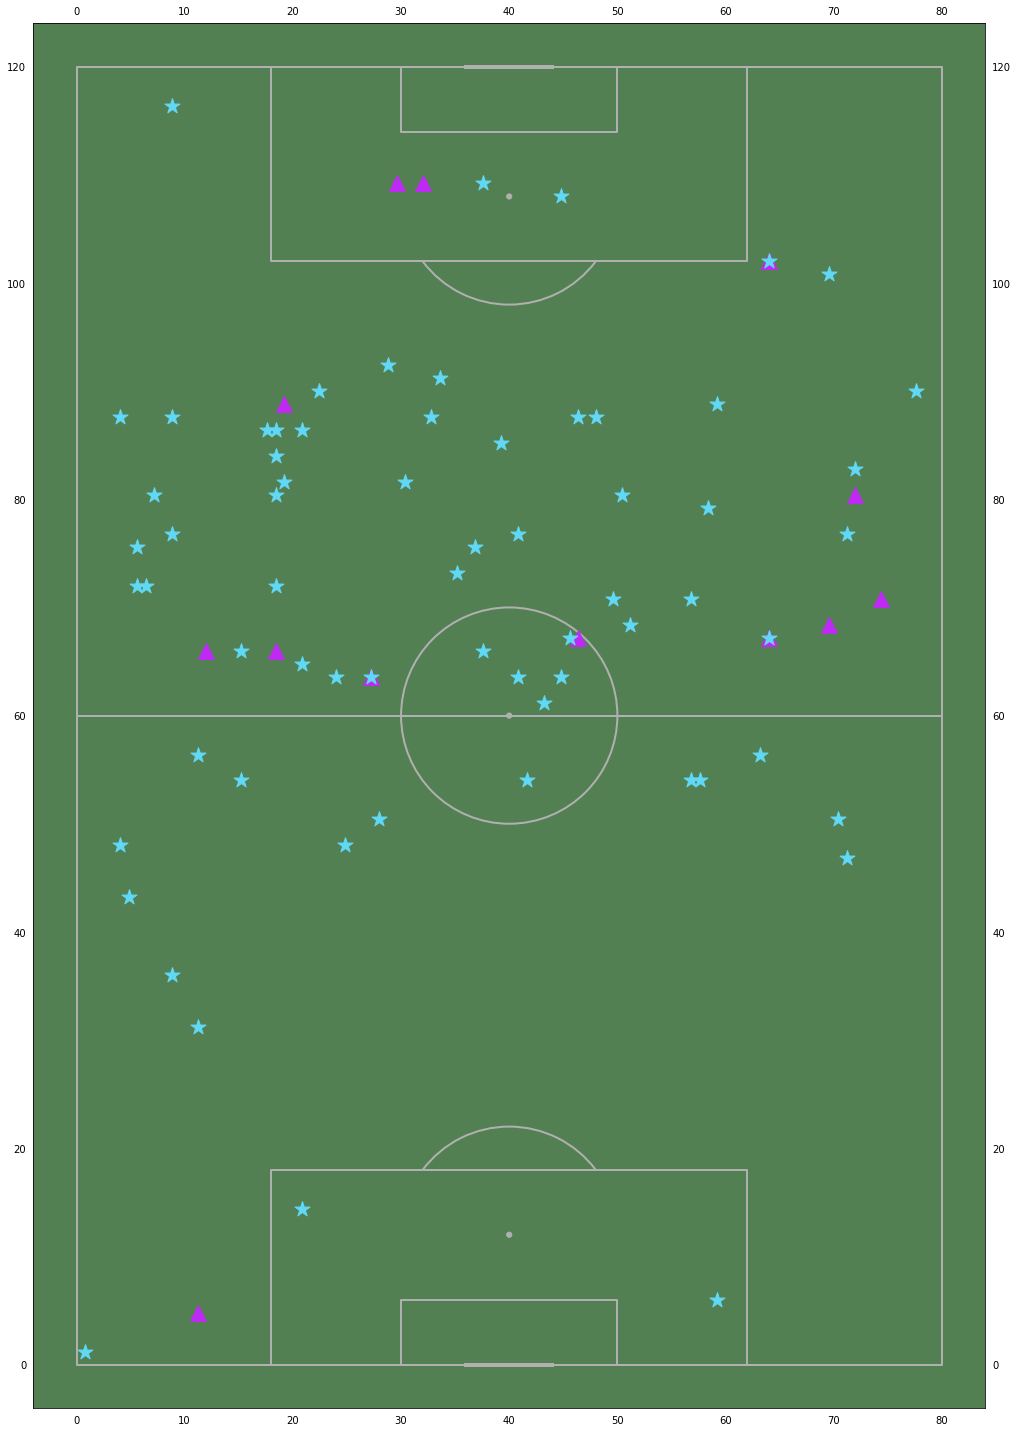

In [139]:
pitch = VerticalPitch(pitch_length=100, pitch_width=100,
              axis=True, label=True,pitch_color = '#538053',half=False)
fig,ax =pitch.draw(figsize =(40,20))
    
plt.scatter(dataAwayDef['Y'],dataAwayDef['X'],c='#BE2AF3',s = 250,marker = "^")

plt.scatter(dataAwayPass['Y'],dataAwayPass['X'],c='#60D8F6',s = 250 ,marker = '*')

plt.scatter(dataAwayShot['Y'],dataAwayShot['X'],c='#F6BF60',s = 250,marker = "h")


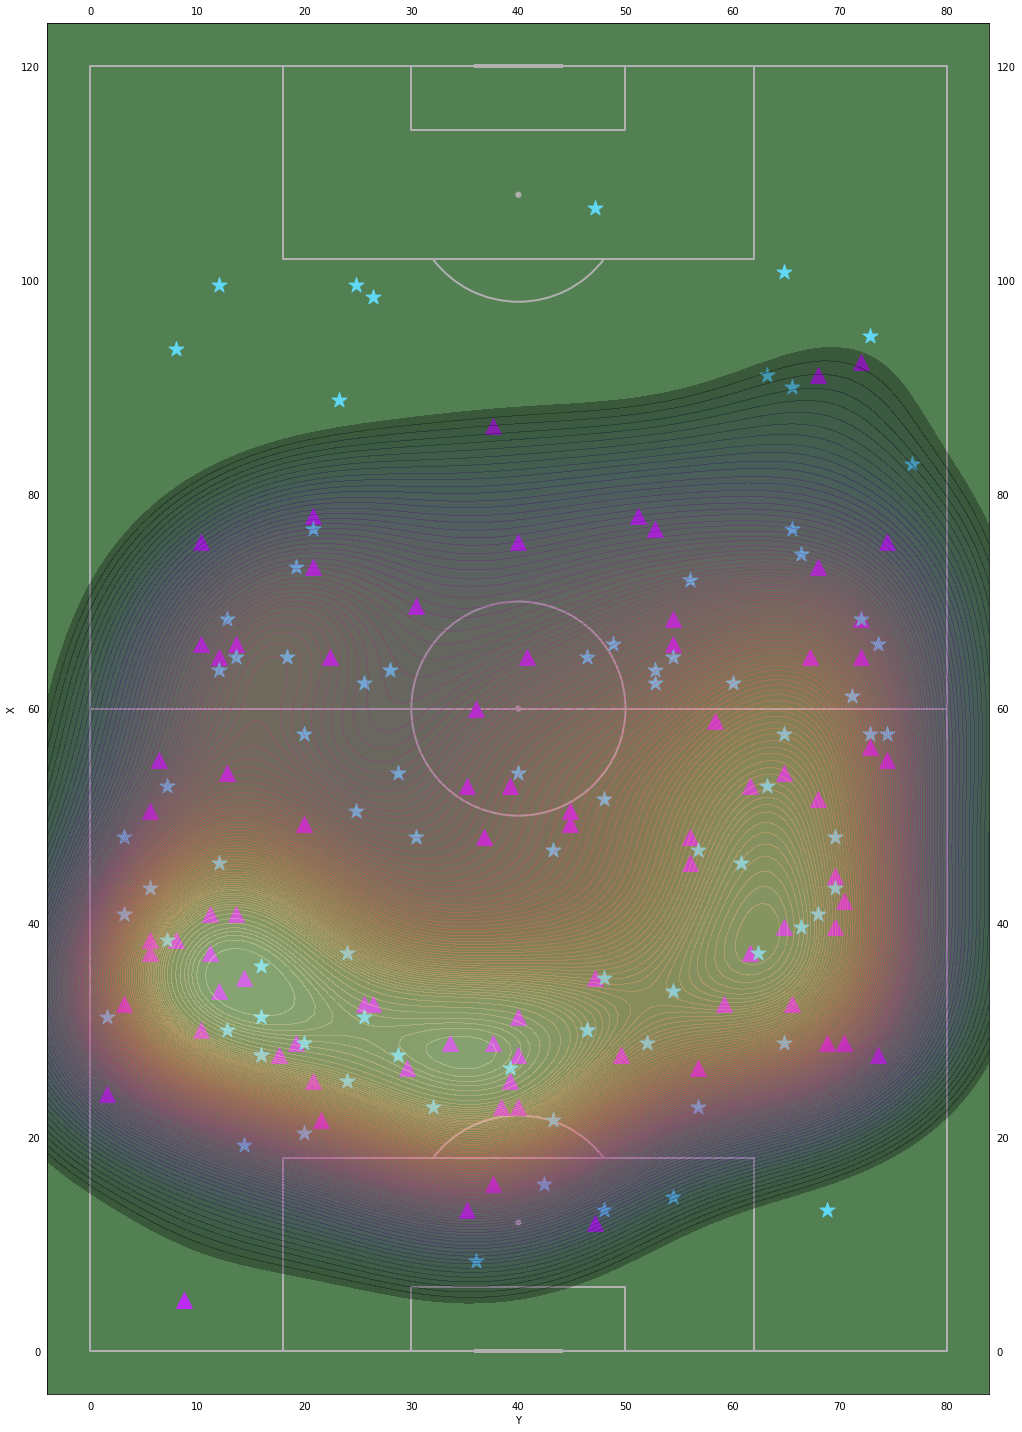

In [150]:
pitch = VerticalPitch(pitch_length=100, pitch_width=100,
              axis=True, label=True,pitch_color = '#538053',half=False)
fig,ax =pitch.draw(figsize =(40,20))
    
plt.scatter(dataHomePass['Y'],dataHomePass['X'],c='#BE2AF3',s = 250,marker = "^")
plt.scatter(dataHomePass['Y2'],dataHomePass['X2'],c='#60D8F6',s = 250 ,marker = '*')

kde = sns.kdeplot(x = dataHomePass['Y'], y = dataHomePass['X'],
                  fill = True,shade_lowest=False,common_grid=False,
                  alpha=.3,thresh=.1,n_levels=100,cmap = 'magma')


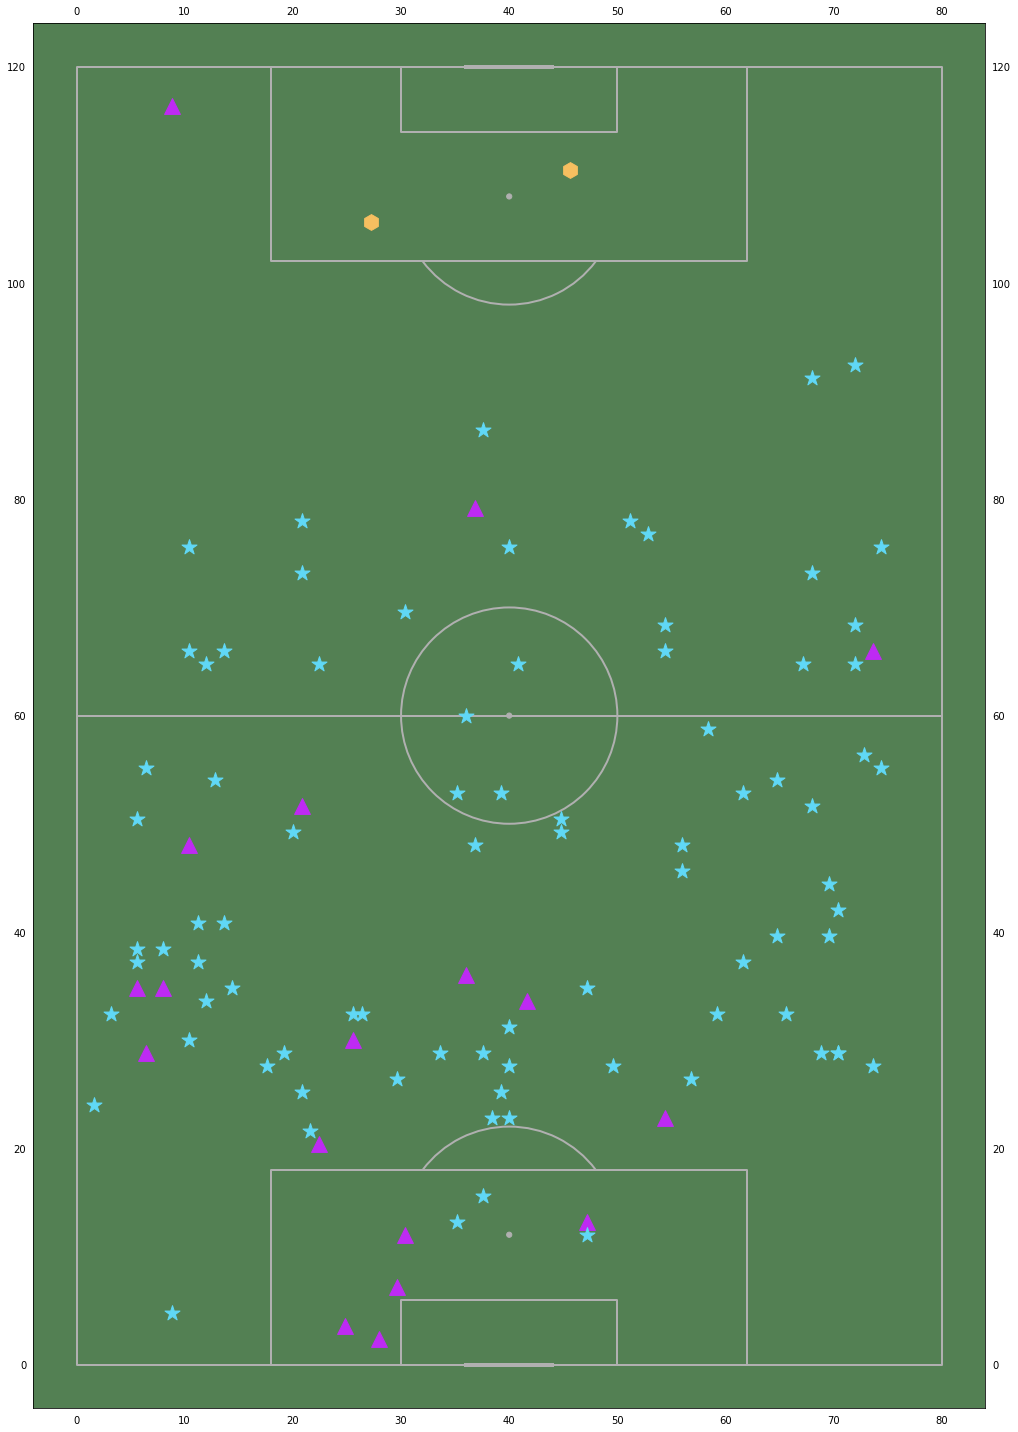

In [142]:
pitch = VerticalPitch(pitch_length=100, pitch_width=100,
              axis=True, label=True,pitch_color = '#538053',half=False)
fig,ax =pitch.draw(figsize =(40,20))
    
plt.scatter(dataHomeDef['Y'],dataHomeDef['X'],c='#BE2AF3',s = 250,marker = "^")

plt.scatter(dataHomePass['Y'],dataHomePass['X'],c='#60D8F6',s = 250 ,marker = '*')

plt.scatter(dataHomeShot['Y'],dataHomeShot['X'],c='#F6BF60',s = 250,marker = "h")



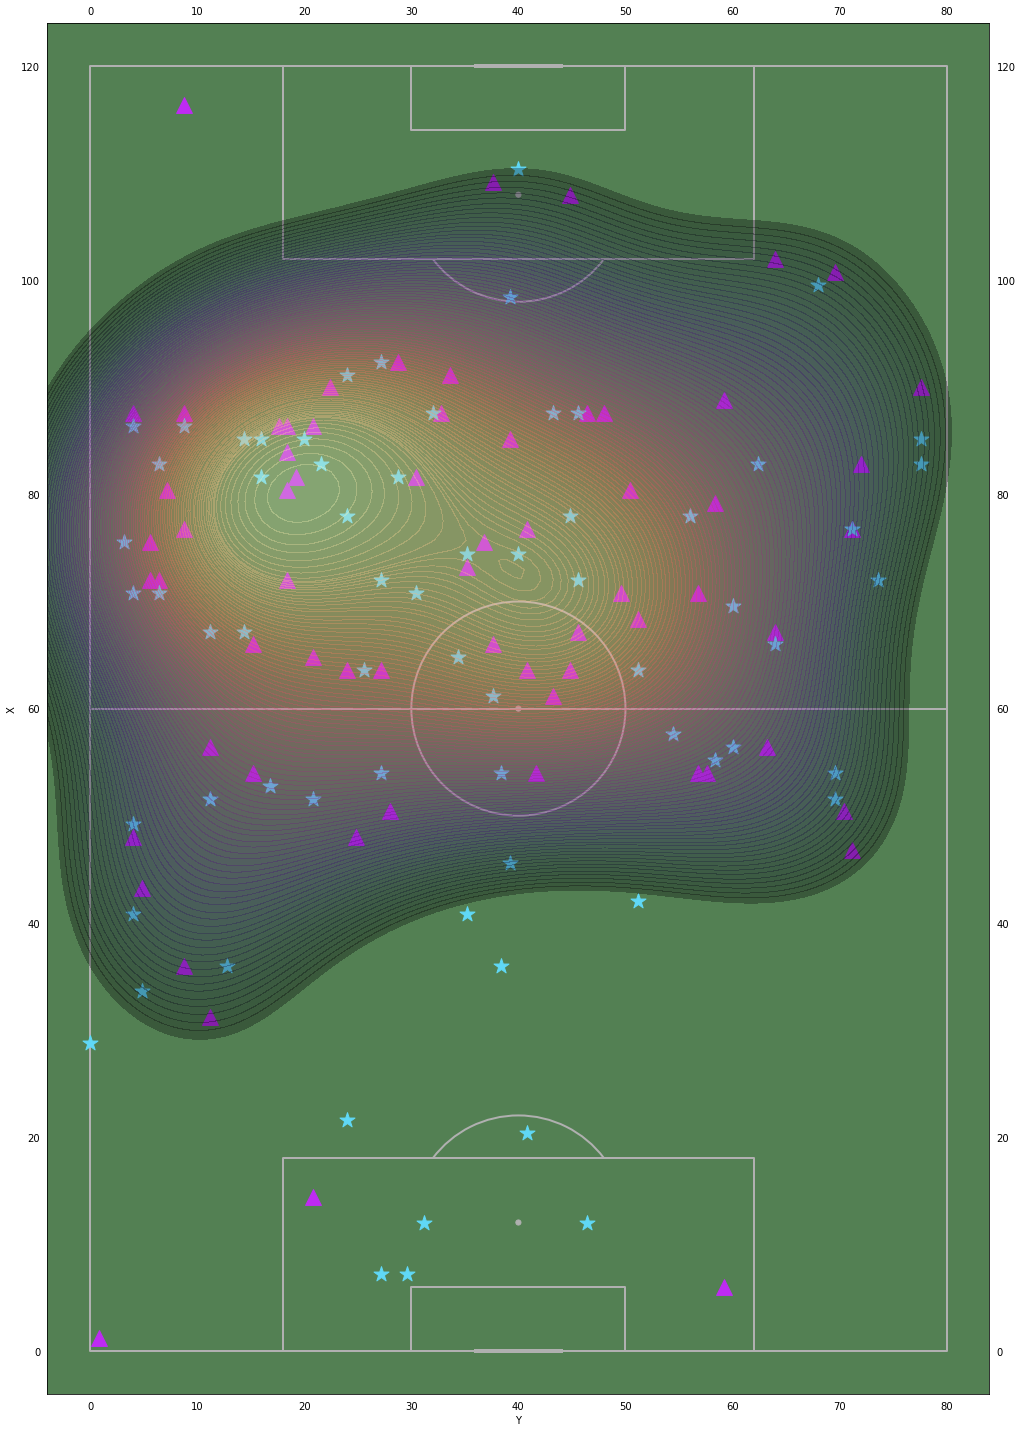

In [152]:
pitch = VerticalPitch(pitch_length=100, pitch_width=100,
              axis=True, label=True,pitch_color = '#538053',half=False)
fig,ax =pitch.draw(figsize =(40,20))
    
plt.scatter(dataAwayPass['Y'],dataAwayPass['X'],c='#BE2AF3',s = 250,marker = "^")
plt.scatter(dataAwayPass['Y2'],dataAwayPass['X2'],c='#60D8F6',s = 250 ,marker = '*')

kde = sns.kdeplot(x = dataAwayPass['Y'], y = dataAwayPass['X'],
                  fill = True,shade_lowest=False,common_grid=False,
                  alpha=.3,thresh=.2,n_levels=100,cmap = 'magma')
